In [1]:
import copy

import pandas as pd

In [2]:
df = pd.read_csv('storage/tables/SimATTA_PACS_LE0_IC0_k1_el0.0001.csv')

In [9]:
# split the table into two tables, the seperated row is 7, i.e., 7th and further rows are the second table
df1 = df.iloc[:7]
df2 = df.iloc[8:]

In [10]:
df1

,Unnamed: 0,2,0,1,3,Test AVG
0,Current domain,NaN,0.5122,0.5789,0.6773,NaN
1,Budgets,NaN,30.0000,54.0000,94.0000,NaN
2,2,0.9970,0.8713,0.8934,0.8503,NaN
3,0,0.5938,0.6802,0.7178,0.6797,NaN
4,1,0.2803,0.3904,0.6314,0.7363,NaN
5,3,0.4291,0.4172,0.6022,0.7455,NaN
6,Frame AVG,NaN,NaN,NaN,NaN,NaN


In [14]:
df2

,Unnamed: 0,2,0,1,3,Test AVG
8,Current step,0.4389,0.5990,0.6226,0.6612,NaN
9,Budgets,30.0000,51.0000,72.0000,93.0000,NaN
10,2,0.8479,0.7976,0.9509,0.9557,NaN
11,0,0.5176,0.5635,0.6860,0.7451,NaN
12,1,0.4548,0.5776,0.6173,0.6135,NaN
13,3,0.5625,0.6885,0.6243,0.7045,NaN
14,Frame AVG,NaN,NaN,NaN,NaN,NaN


In [19]:
budget1 = df1.iloc[1].values[-2]
budget2 = df2.iloc[1].values[-2]

In [45]:
stream_results1 = df1.iloc[0].values[-4:-1].astype(float)
stream_results2 = df2.iloc[0].values[-5:-1].astype(float)

In [47]:
stream_results1.shape

(3,)

In [38]:
post_adaptation_results1 = df1.iloc[2:6, -2].values
post_adaptation_results2 = df2.iloc[2:6, -2].values

In [52]:
import pandas as pd
def extract_results(file_path):
    r"""
    Extract the results from the csv file
    :return: first table results (budget, stream results, post adaptation results), second table results (budget, stream results, post adaptation results)
    """
    df = pd.read_csv(file_path)
    df1 = df.iloc[:7]
    df2 = df.iloc[8:]
    budget1 = df1.iloc[1].values[-2]
    budget2 = df2.iloc[1].values[-2]
    stream_results1 = df1.iloc[0].values[-4:-1].astype(float)
    stream_results2 = df2.iloc[0].values[-5:-1].astype(float)
    post_adaptation_results1 = df1.iloc[2:6, -2].values
    post_adaptation_results2 = df2.iloc[2:6, -2].values
    return (budget1, stream_results1, post_adaptation_results1), (budget2, stream_results2, post_adaptation_results2)

In [50]:
extract_results('storage/tables/SimATTA_PACS_LE0_IC1_k1_el0.0001.csv')

((293.0,
  array([0.6982, 0.7176, 0.801 ]),
  array([0.9425, 0.811 , 0.8225, 0.8481])),
 (308.0,
  array([0.6144, 0.7452, 0.8125, 0.8251]),
  array([0.9653, 0.8076, 0.8622, 0.8705])))

In [76]:
# transverse all the files in the folder using pathlib
from pathlib import Path
model_results = dict()
for file_path in Path('storage/tables/VLCS').glob('*.csv'):
    # print(file_path)
    # For example, for SimATTA_PACS_LE1_IC1_k2_el0.0001.csv, use the LE and IC to determine the model
    LE = int(file_path.stem.split('_')[2][2:])
    IC = int(file_path.stem.split('_')[3][2:])
    if (LE, IC) not in model_results:
        model_results[(LE, IC)] = {'table1': list(),
                                   'table2': list()}
    (budget1, stream_results1, post_adaptation_results1), (budget2, stream_results2, post_adaptation_results2) = extract_results(file_path)
    model_results[(LE, IC)]['table1'].append((budget1, stream_results1, post_adaptation_results1))
    model_results[(LE, IC)]['table2'].append((budget2, stream_results2, post_adaptation_results2))
print(model_results)


{(0, 1): {'table1': [(486.0, array([0.5915, 0.5387, 0.5261]), array([0.6558, 0.6386, 0.599 , 0.6084])), (757.0, array([0.5926, 0.5088, 0.4754]), array([0.6396, 0.5851, 0.6197, 0.5512])), (656.0, array([0.5087, 0.4799, 0.4621]), array([0.6092, 0.6066, 0.5579, 0.5385])), (158.0, array([0.5753, 0.4287, 0.4422]), array([0.4912, 0.6035, 0.4933, 0.492 ])), (559.0, array([0.5557, 0.5183, 0.5687]), array([0.8806, 0.6201, 0.6441, 0.6389])), (781.0, array([0.6679, 0.6691, 0.7447]), array([0.9915, 0.7395, 0.7413, 0.8119])), (436.0, array([0.5798, 0.5609, 0.6111]), array([0.8367, 0.6423, 0.653 , 0.6828])), (325.0, array([0.6691, 0.6365, 0.6845]), array([0.9739, 0.6988, 0.7166, 0.7565])), (260.0, array([0.5742, 0.5113, 0.4209]), array([0.4346, 0.567 , 0.5302, 0.4479])), (446.0, array([0.5757, 0.5314, 0.604 ]), array([0.918 , 0.6084, 0.6325, 0.6674])), (602.0, array([0.5041, 0.4046, 0.4023]), array([0.4742, 0.5245, 0.4982, 0.4757])), (632.0, array([0.5237, 0.464 , 0.4381]), array([0.6297, 0.555 , 0.

In [77]:
# sort the model_results by budget
for model in model_results:
    model_results[model]['table1'].sort(key=lambda x: x[0])
    model_results[model]['table2'].sort(key=lambda x: x[0])
print(model_results)

{(0, 1): {'table1': [(158.0, array([0.5753, 0.4287, 0.4422]), array([0.4912, 0.6035, 0.4933, 0.492 ])), (260.0, array([0.5742, 0.5113, 0.4209]), array([0.4346, 0.567 , 0.5302, 0.4479])), (325.0, array([0.6691, 0.6365, 0.6845]), array([0.9739, 0.6988, 0.7166, 0.7565])), (436.0, array([0.5798, 0.5609, 0.6111]), array([0.8367, 0.6423, 0.653 , 0.6828])), (446.0, array([0.5757, 0.5314, 0.604 ]), array([0.918 , 0.6084, 0.6325, 0.6674])), (486.0, array([0.5915, 0.5387, 0.5261]), array([0.6558, 0.6386, 0.599 , 0.6084])), (559.0, array([0.5557, 0.5183, 0.5687]), array([0.8806, 0.6201, 0.6441, 0.6389])), (602.0, array([0.5041, 0.4046, 0.4023]), array([0.4742, 0.5245, 0.4982, 0.4757])), (632.0, array([0.5237, 0.464 , 0.4381]), array([0.6297, 0.555 , 0.5582, 0.5193])), (656.0, array([0.5087, 0.4799, 0.4621]), array([0.6092, 0.6066, 0.5579, 0.5385])), (757.0, array([0.5926, 0.5088, 0.4754]), array([0.6396, 0.5851, 0.6197, 0.5512])), (781.0, array([0.6679, 0.6691, 0.7447]), array([0.9915, 0.7395, 0.

In [78]:
import copy
avg_model_results = copy.deepcopy(model_results)
for model in avg_model_results:
    for table in avg_model_results[model]:
        for i in range(len(avg_model_results[model][table])):
            avg_model_results[model][table][i] = (avg_model_results[model][table][i][0],
                                                   avg_model_results[model][table][i][1],
                                                   avg_model_results[model][table][i][2],
                                                   avg_model_results[model][table][i][1].mean(),
                                                   avg_model_results[model][table][i][2].mean(),
                                                  (avg_model_results[model][table][i][1].sum() + avg_model_results[model][table][i][2].sum())/(len(avg_model_results[model][table][i][1]) + len(avg_model_results[model][table][i][2])))

In [79]:
avg_model_results

{(0,
  1): {'table1': [(158.0,
    array([0.5753, 0.4287, 0.4422]),
    array([0.4912, 0.6035, 0.4933, 0.492 ]),
    0.48206666666666664,
    0.52,
    0.5037428571428572),
   (260.0,
    array([0.5742, 0.5113, 0.4209]),
    array([0.4346, 0.567 , 0.5302, 0.4479]),
    0.5021333333333334,
    0.49492499999999995,
    0.4980142857142857),
   (325.0,
    array([0.6691, 0.6365, 0.6845]),
    array([0.9739, 0.6988, 0.7166, 0.7565]),
    0.6633666666666667,
    0.78645,
    0.7336999999999999),
   (436.0,
    array([0.5798, 0.5609, 0.6111]),
    array([0.8367, 0.6423, 0.653 , 0.6828]),
    0.5839333333333333,
    0.7037,
    0.6523714285714285),
   (446.0,
    array([0.5757, 0.5314, 0.604 ]),
    array([0.918 , 0.6084, 0.6325, 0.6674]),
    0.5703666666666667,
    0.706575,
    0.6482),
   (486.0,
    array([0.5915, 0.5387, 0.5261]),
    array([0.6558, 0.6386, 0.599 , 0.6084]),
    0.5520999999999999,
    0.6254500000000001,
    0.5940142857142857),
   (559.0,
    array([0.5557, 0.5183, 0.5

In [80]:
# formulate models as labels, budget as x-axis, mean accuracy as y-axis, plot the results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

(103.0, array([0.5712, 0.5134, 0.644 ]), array([0.9647, 0.5809, 0.5722, 0.6605]), 0.5762, 0.6945749999999999, 0.6438428571428572)
3
(158.0, array([0.5753, 0.4287, 0.4422]), array([0.4912, 0.6035, 0.4933, 0.492 ]), 0.48206666666666664, 0.52, 0.5037428571428572)
3
(103.0, array([0.6043, 0.5585, 0.7002]), array([0.9993, 0.6581, 0.6088, 0.7189]), 0.621, 0.746275, 0.6925857142857144)
3
(148.0, array([0.628 , 0.6054, 0.7227]), array([0.9908, 0.6931, 0.6895, 0.7642]), 0.6520333333333334, 0.7844, 0.7276714285714286)
3
(103.0, array([0.5712, 0.5134, 0.644 ]), array([0.9647, 0.5809, 0.5722, 0.6605]), 0.5762, 0.6945749999999999, 0.6438428571428572)
4
(158.0, array([0.5753, 0.4287, 0.4422]), array([0.4912, 0.6035, 0.4933, 0.492 ]), 0.48206666666666664, 0.52, 0.5037428571428572)
4
(103.0, array([0.6043, 0.5585, 0.7002]), array([0.9993, 0.6581, 0.6088, 0.7189]), 0.621, 0.746275, 0.6925857142857144)
4
(148.0, array([0.628 , 0.6054, 0.7227]), array([0.9908, 0.6931, 0.6895, 0.7642]), 0.6520333333333334

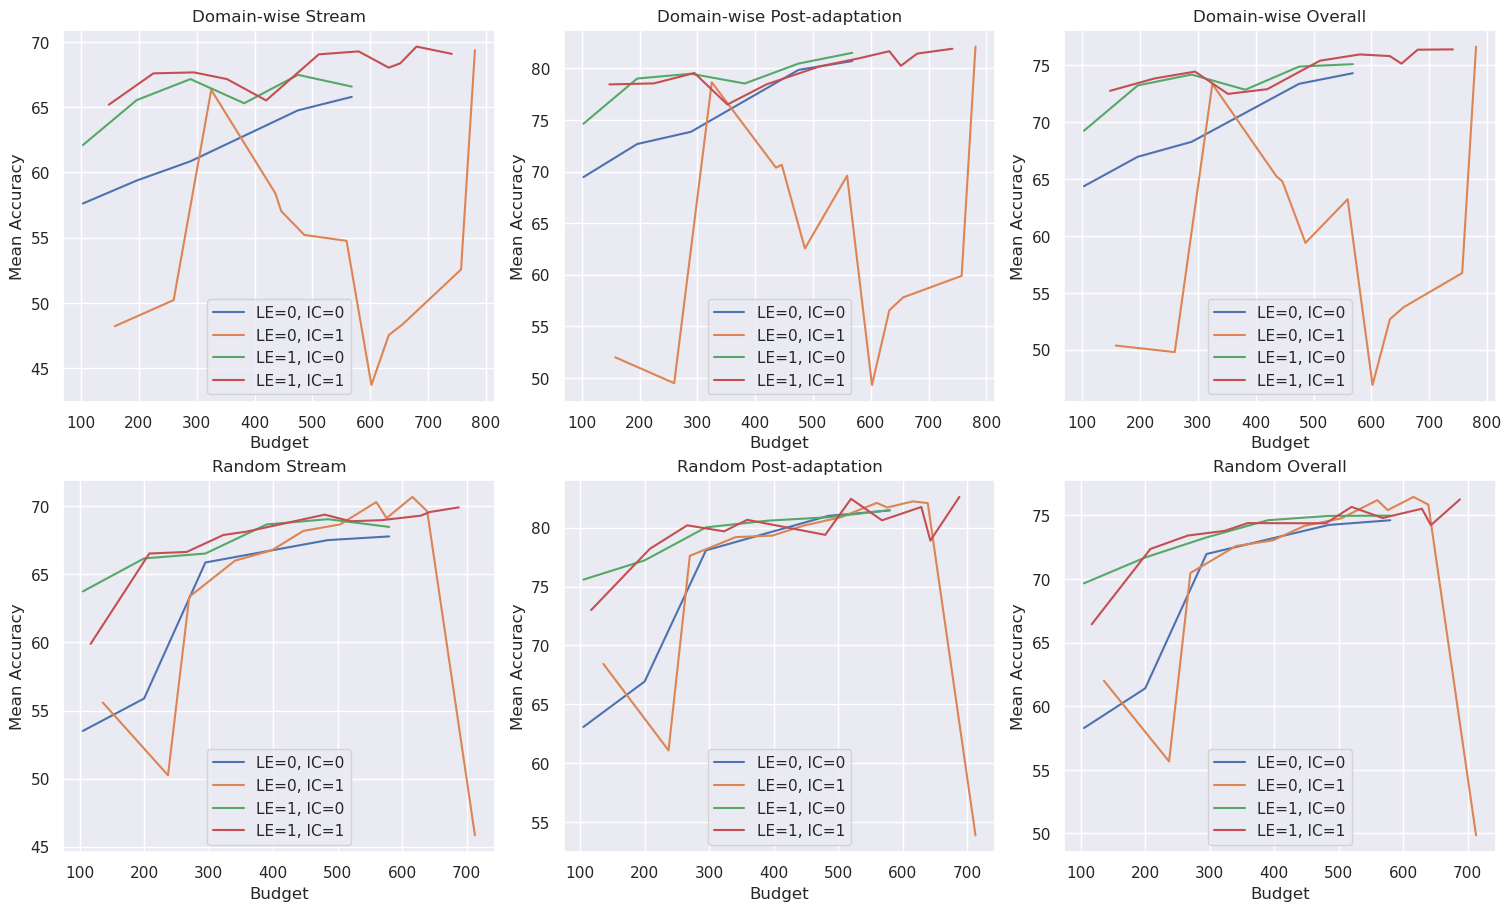

In [81]:
# formulate models as labels, budget as x-axis, mean accuracy as y-axis, plot the results
# plot into 2 x 3 subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 9), constrained_layout=True)
for ti, table in enumerate(['table1', 'table2']):
    for acc_index in [3, 4, 5]:
        for i, model in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
            print(avg_model_results[model][table][0])
            print(acc_index)
            axs[ti, acc_index-3].plot([x[0] for x in avg_model_results[model][table]],
                                     [x[acc_index] * 100 for x in avg_model_results[model][table]],
                                     label=f'LE={model[0]}, IC={model[1]}')
        axs[ti, acc_index-3].set_xlabel('Budget')
        axs[ti, acc_index-3].set_ylabel('Mean Accuracy')
        axs[ti, acc_index-3].set_title(f'{"Domain-wise" if table == "table1" else "Random"} {["Stream", "Post-adaptation", "Overall"][acc_index-3]}')
        axs[ti, acc_index-3].legend()

{(1, 1): {'table1': [(427.0, array([0.7471, 0.7696, 0.8089]), array([0.9874, 0.8564, 0.866 , 0.8748])), (403.0, array([0.7617, 0.7624, 0.7959]), array([0.9892, 0.855 , 0.8537, 0.8669])), (99.0, array([0.6987, 0.6442, 0.6681]), array([0.985 , 0.7554, 0.7078, 0.7363])), (259.0, array([0.7363, 0.7018, 0.762 ]), array([0.979 , 0.8325, 0.7995, 0.8422])), (472.0, array([0.7729, 0.7931, 0.8142]), array([0.9838, 0.8813, 0.8494, 0.8712])), (307.0, array([0.7412, 0.7218, 0.7625]), array([0.9928, 0.832 , 0.8319, 0.8325])), (509.0, array([0.7788, 0.7841, 0.7987]), array([0.9701, 0.874 , 0.8613, 0.871 ])), (550.0, array([0.769 , 0.7718, 0.8206]), array([0.979 , 0.8906, 0.8631, 0.8908])), (346.0, array([0.7656, 0.7577, 0.7982]), array([0.982 , 0.8345, 0.8545, 0.8201])), (530.0, array([0.7617, 0.7922, 0.7865]), array([0.982 , 0.8677, 0.8767, 0.8641])), (209.0, array([0.7295, 0.698 , 0.7226]), array([0.9569, 0.8135, 0.773 , 0.7933])), (169.0, array([0.7246, 0.6681, 0.7468]), array([0.9868, 0.8062, 0.7

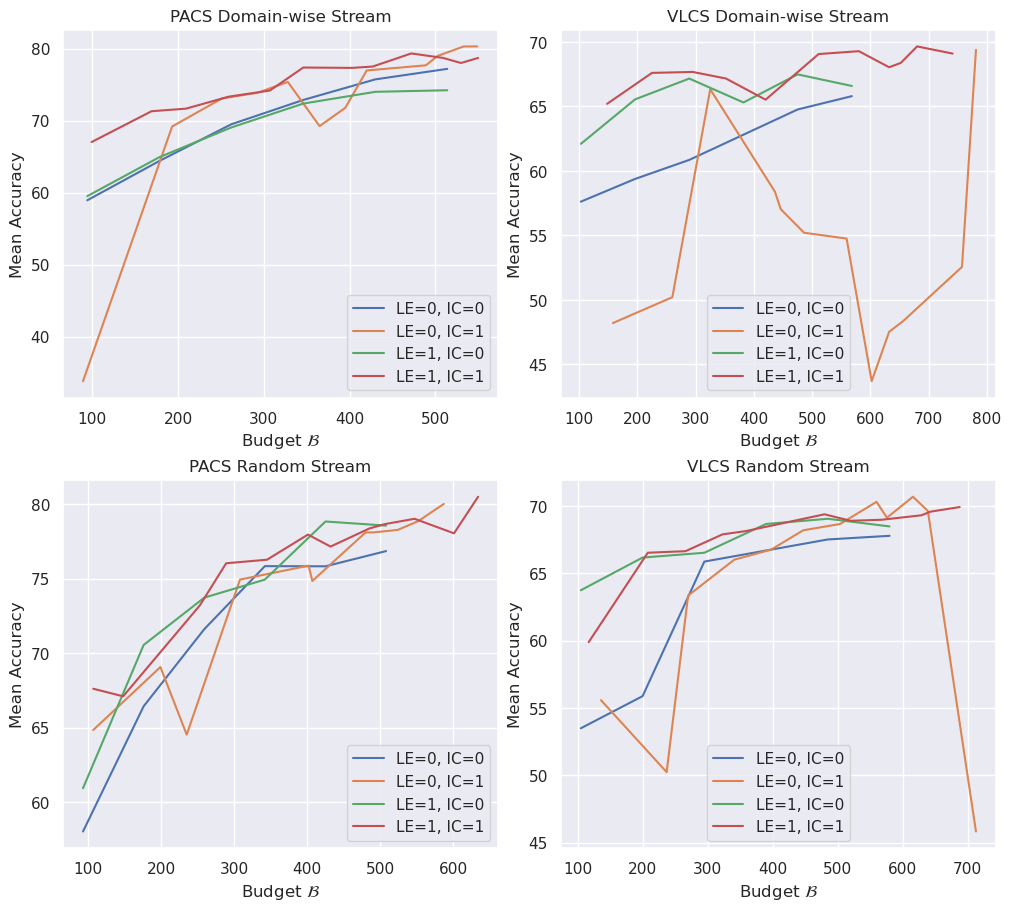

In [87]:
import pandas as pd
from pathlib import Path
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
def extract_results(file_path):
    r"""
    Extract the results from the csv file
    :return: first table results (budget, stream results, post adaptation results), second table results (budget, stream results, post adaptation results)
    """
    df = pd.read_csv(file_path)
    df1 = df.iloc[:7]
    df2 = df.iloc[8:]
    budget1 = df1.iloc[1].values[-2]
    budget2 = df2.iloc[1].values[-2]
    stream_results1 = df1.iloc[0].values[-4:-1].astype(float)
    stream_results2 = df2.iloc[0].values[-5:-1].astype(float)
    post_adaptation_results1 = df1.iloc[2:6, -2].values
    post_adaptation_results2 = df2.iloc[2:6, -2].values
    return (budget1, stream_results1, post_adaptation_results1), (budget2, stream_results2, post_adaptation_results2)

# transverse all the files in the folder using pathlib
def read_table_results(dataset):
    model_results = dict()
    for file_path in Path(f'storage/tables/{dataset}').glob('*.csv'):
        # print(file_path)
        # For example, for SimATTA_PACS_LE1_IC1_k2_el0.0001.csv, use the LE and IC to determine the model
        LE = int(file_path.stem.split('_')[2][2:])
        IC = int(file_path.stem.split('_')[3][2:])
        if (LE, IC) not in model_results:
            model_results[(LE, IC)] = {'table1': list(),
                                       'table2': list()}
        (budget1, stream_results1, post_adaptation_results1), (budget2, stream_results2, post_adaptation_results2) = extract_results(file_path)
        model_results[(LE, IC)]['table1'].append((budget1, stream_results1, post_adaptation_results1))
        model_results[(LE, IC)]['table2'].append((budget2, stream_results2, post_adaptation_results2))
    print(model_results)

    # sort the model_results by budget
    for model in model_results:
        model_results[model]['table1'].sort(key=lambda x: x[0])
        model_results[model]['table2'].sort(key=lambda x: x[0])
    print(model_results)


    avg_model_results = copy.deepcopy(model_results)
    for model in avg_model_results:
        for table in avg_model_results[model]:
            for i in range(len(avg_model_results[model][table])):
                avg_model_results[model][table][i] = (avg_model_results[model][table][i][0],
                                                       avg_model_results[model][table][i][1],
                                                       avg_model_results[model][table][i][2],
                                                       avg_model_results[model][table][i][1].mean(),
                                                       avg_model_results[model][table][i][2].mean(),
                                                      (avg_model_results[model][table][i][1].sum() + avg_model_results[model][table][i][2].sum())/(len(avg_model_results[model][table][i][1]) + len(avg_model_results[model][table][i][2])))
    return avg_model_results

# formulate models as labels, budget as x-axis, mean accuracy as y-axis, plot the results

fig, axs = plt.subplots(2, 2, figsize=(10, 9), constrained_layout=True)
for tj, dataset in enumerate(['PACS', 'VLCS']):
    avg_model_results = read_table_results(dataset)
    for ti, table in enumerate(['table1', 'table2']):
        for acc_index in [3]:
            for i, model in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
                print(avg_model_results[model][table][0])
                print(acc_index)
                axs[ti, tj].plot([x[0] for x in avg_model_results[model][table]],
                                         [x[acc_index] * 100 for x in avg_model_results[model][table]],
                                         label=f'LE={model[0]}, IC={model[1]}')
            axs[ti, tj].set_xlabel('Budget $\mathcal{B}$')
            axs[ti, tj].set_ylabel('Mean Accuracy')
            axs[ti, tj].set_title(f'{dataset} {"Domain-wise" if table == "table1" else "Random"} {["Stream", "Post-adaptation", "Overall"][acc_index-3]}')
            axs[ti, tj].legend()


# formulate models as labels, budget as x-axis, mean accuracy as y-axis, plot the results
# plot into 2 x 3 subplots
# avg_model_results = read_table_results('VLCS')
# fig, axs = plt.subplots(2, 3, figsize=(15, 9), constrained_layout=True)
# for ti, table in enumerate(['table1', 'table2']):
#     for acc_index in [3, 4, 5]:
#         for i, model in enumerate([(0, 0), (0, 1), (1, 0), (1, 1)]):
#             print(avg_model_results[model][table][0])
#             print(acc_index)
#             axs[ti, acc_index-3].plot([x[0] for x in avg_model_results[model][table]],
#                                      [x[acc_index] * 100 for x in avg_model_results[model][table]],
#                                      label=f'LE={model[0]}, IC={model[1]}')
#         axs[ti, acc_index-3].set_xlabel('Budget')
#         axs[ti, acc_index-3].set_ylabel('Mean Accuracy')
#         axs[ti, acc_index-3].set_title(f'{"Domain-wise" if table == "table1" else "Random"} {["Stream", "Post-adaptation", "Overall"][acc_index-3]}')
#         axs[ti, acc_index-3].legend()